### 📦 Install Required Libraries
We start by installing essential packages for this notebook. These include `imbalanced-learn` for SMOTE, along with `pandas` and `scikit-learn`.



In [ ]:
!pip install imbalanced-learn pandas scikit-learn


### 🎯 Define Features and Target Variable  
Separate the input features (`X`) from the target label (`y`). This is necessary before applying SMOTE or training any model.


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Install required package if not already installed
# !pip install imbalanced-learn

# Upload the dataset to Colab
from google.colab import files
uploaded = files.upload()

# Read the dataset
df = pd.read_csv('PATH')

# Function to generate synthetic data
def generate_synthetic_data(df, n_samples_per_phase=10):
    # Separate features and target
    X = df.drop(['ID'], axis=1)  # Remove ID as it shouldn't be used for generation
    y = X['phase']  # Use phase as the target for SMOTE

    # Calculate the desired number of samples for each phase
    strategy = {1: n_samples_per_phase, 2: n_samples_per_phase,
               3: n_samples_per_phase, 4: n_samples_per_phase}

    # Initialize SMOTE
    smote = SMOTE(sampling_strategy=strategy,
                  k_neighbors=5,  # Using 5 neighbors as we have enough samples
                  random_state=42)

    # Fit and resample
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Generate new IDs for synthetic samples
    max_id = df['ID'].max()
    new_ids = range(max_id + 1, max_id + 1 + len(X_resampled))

    # Add new IDs to resampled data
    X_resampled.insert(0, 'ID', new_ids)

    return X_resampled

# Round numeric columns to maintain reasonable precision
def round_columns(df):
    columns_to_round = {
        'durata': 0,
        'DistTOT': 1,
        'HSR': 1,
        'ACC': 0,
        'DEC': 0,
        'RPE': 1,
        'sRPE': 0
    }

    for col, decimals in columns_to_round.items():
        if col in df.columns:
            df[col] = df[col].round(decimals)

    return df

# Generate synthetic data
n_samples_per_phase = 1000  # Number of synthetic samples to generate per phase
synthetic_df = generate_synthetic_data(df, n_samples_per_phase)
synthetic_df = round_columns(synthetic_df)

# Print information about the original and synthetic data
print(f"Original data shape: {df.shape}")
print(f"Synthetic data shape: {synthetic_df.shape}")

# Calculate basic statistics to compare original and synthetic data
print("\nOriginal Data Statistics:")
print(df.describe())
print("\nSynthetic Data Statistics:")
print(synthetic_df.describe())

# Save synthetic data to CSV
synthetic_df.to_csv('synthetic_training_data.csv', index=False)

# Download the synthetic dataset
files.download('synthetic_training_data.csv')

# Optional: Create a combined dataset with both original and synthetic data
combined_df = pd.concat([df, synthetic_df], axis=0)
combined_df.to_csv('SMOTE4.csv', index=False)
files.download('SMOTE4.csv')

Saving Dataset.csv to Dataset (2).csv
Original data shape: (64, 9)
Synthetic data shape: (4000, 9)

Original Data Statistics:
              ID      phase      durata       DistTOT          HSR  \
count  64.000000  64.000000   64.000000     64.000000    64.000000   
mean    8.500000   2.500000  307.656250  19351.249870  5576.935677   
std     4.646214   1.126872   23.834894   2047.209039  1074.187310   
min     1.000000   1.000000  253.000000  15340.100000  3847.500000   
25%     4.750000   1.750000  293.750000  17713.216667  4791.925000   
50%     8.500000   2.500000  309.500000  19129.700000  5302.000000   
75%    12.250000   3.250000  328.000000  20793.550000  6369.525000   
max    16.000000   4.000000  343.000000  24084.000000  7708.200000   

              ACC         DEC        RPE         sRPE  
count   64.000000   64.000000  64.000000    64.000000  
mean   259.218750  245.250000  13.429688  1388.250000  
std     48.963695   62.246566   3.184620   351.303378  
min    169.000000  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 📊 Comparing Feature Distributions: Original vs SMOTE-Generated Data

This section visualizes and compares the distributions of numerical features between the original dataset and the SMOTE-synthetically generated dataset. Kernel Density Estimation (KDE) plots are used for each numerical feature to evaluate how closely the synthetic data matches the original data's distribution.

- Blue represents the **original data**.
- Red represents the **SMOTE-synthetic data**.

This helps in assessing the realism and quality of the SMOTE augmentation process.


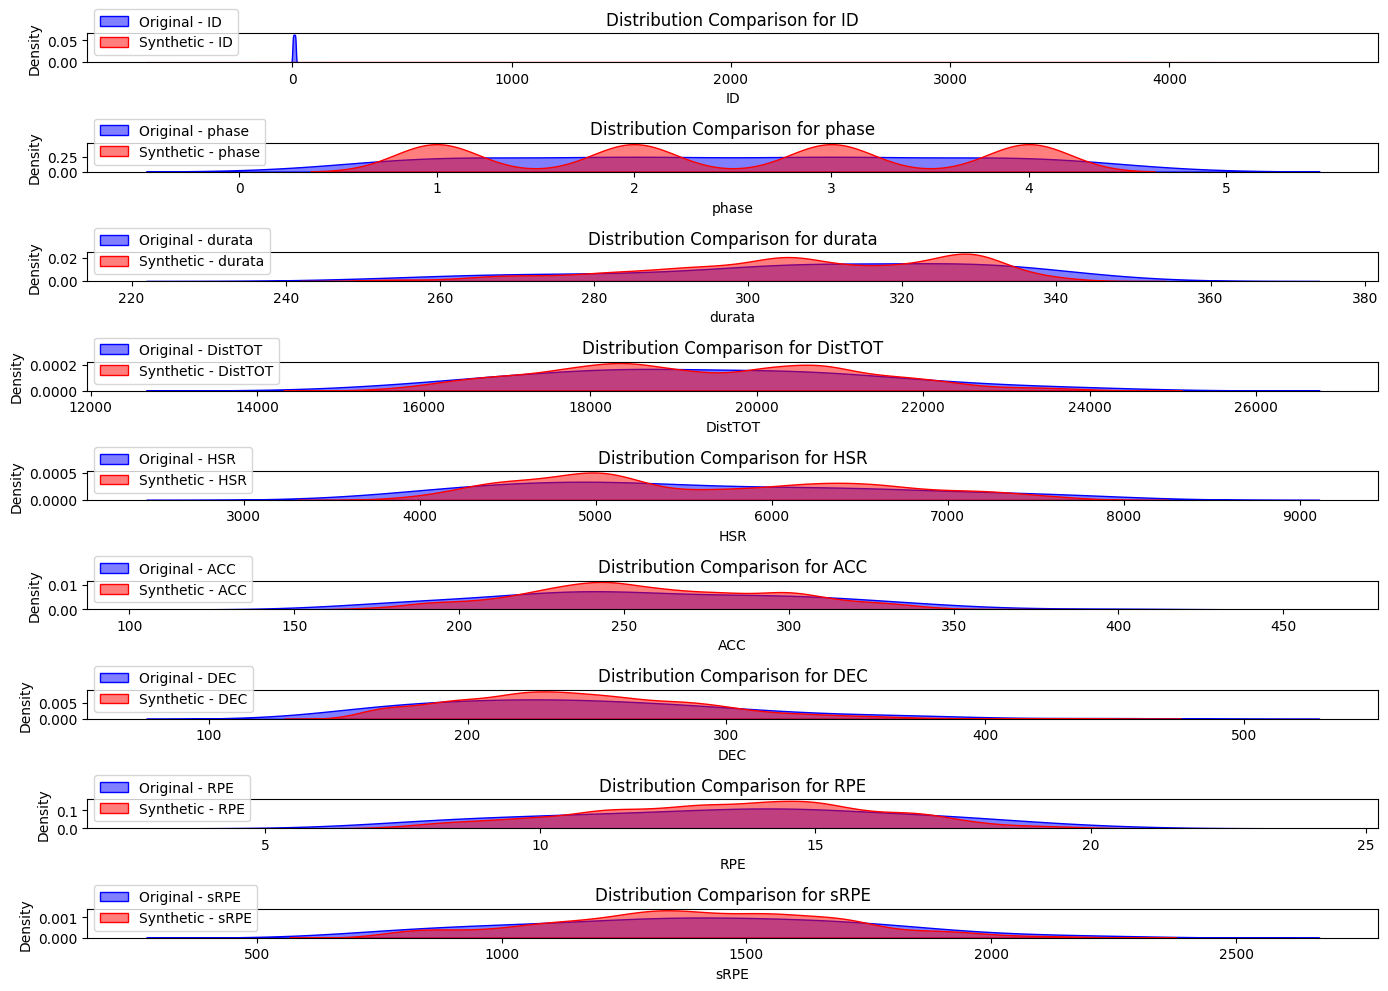

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the original dataset
original_data = pd.read_csv('PATH')

# Load the synthetic dataset
synthetic_data = pd.read_csv('PATH')

# Identify numerical columns in both datasets
original_numerical_columns = original_data.select_dtypes(include=['float64', 'int64']).columns
synthetic_numerical_columns = synthetic_data.select_dtypes(include=['float64', 'int64']).columns

# Create a figure for plotting
plt.figure(figsize=(14, 10))

# Plot distributions for each numerical column in the original dataset
for i, column in enumerate(original_numerical_columns):
    plt.subplot(len(original_numerical_columns), 1, i+1)
    sns.kdeplot(original_data[column], label=f'Original - {column}', fill=True, color='blue', alpha=0.5)
    sns.kdeplot(synthetic_data[column], label=f'Synthetic - {column}', fill=True, color='red', alpha=0.5)
    plt.title(f'Distribution Comparison for {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Density')
    plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
